In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import algo_sgd
from  ML2_lib import merge


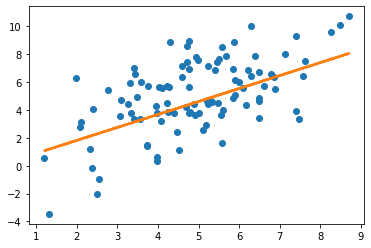

In [2]:
# データ生成デモ Gauss
X_mean = 5
X_var = 2
rng = np.random.default_rng()
X = rng.normal(loc=X_mean,size=100,scale=X_var)
Y = noise.Gauss(sigma=2.2,dim=X.shape[0],n=1).generate() + X



a = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)



x_m = np.linspace(X.min(),X.max(),1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)

plt.show()



In [3]:
trial_num = 100 #試行回数
result_gauss = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss_gauss = [] # 過剰期待損失の最終結果　トライアル数*分割数k
valid_k = 100 # 分割数　1 ~ valid_k

w_star = 1
X_mean = 5
X_var = 2

X_test = rng.normal(loc=X_mean,size=100,scale=X_var)
Y_test = noise.Gauss(sigma=2.2,dim=X_test.shape[0],n=1).generate() + X_test

for _ in tqdm(range(trial_num)):
    w_per_trial = [] # モデルを貯めていく、必要かどうか
    loss_store = [] # 過剰期待損失を貯めていく
    a = 0.01 # 学習率
    c = 5 # wの初期値がとりうる範囲
    n = 250 # データセットのサンプル数
    b = 2.2 # ノイズの分散
    # 初期値wの決定
    w = rng.uniform(w_star-c,w_star+c)
    for k in range(1,valid_k+1):
        core_store = []
        model_store = []



        son = loss.LinearQuadraticLoss()
        for i in range(k):
            core_num = n // k
            rng = np.random.default_rng()
            X = rng.normal(loc=X_mean,size=core_num,scale=X_var)
            Y = noise.Gauss(sigma=b,dim=X.shape[0],n=1).generate() + X
            data = [X,Y]

            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            model_store.append(core.w)

        model_store = np.array(model_store)
        model_store = model_store.reshape([-1,1])

        tmp = merge.smallball(model_store)
        w_per_trial.append(tmp)
        loss_store.append(np.mean(son.f(y=Y_test,x=X_test,w=tmp)))

    result_gauss.append(np.array(w_per_trial))
    result_loss_gauss.append(np.array(loss_store))

result_gauss = np.array(result_gauss)
result_loss_gauss = np.array(result_loss_gauss)





  0%|          | 0/100 [00:00<?, ?it/s]

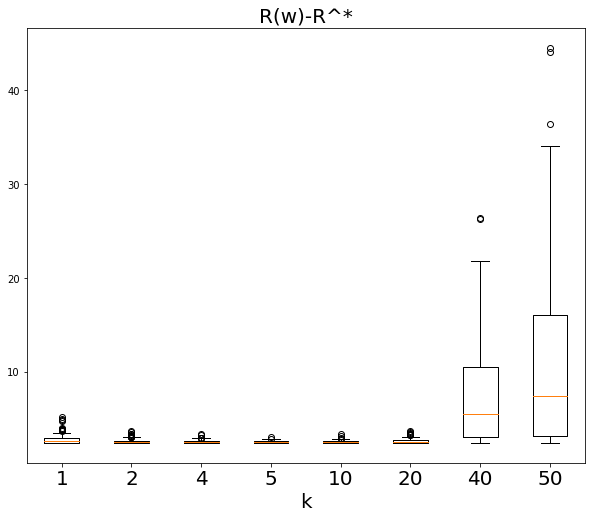

In [4]:
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20','40','50']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19,39,49]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()

In [6]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19,39,49]],columns=columns)

In [7]:
df.describe()

,1,2,4,5,10,20,40,50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.884565,2.671409,2.605592,2.581891,2.579848,2.652936,7.783314,11.624865
std,0.598956,0.274602,0.187212,0.129912,0.155577,0.269057,5.827375,10.330650
min,2.459778,2.459454,2.459461,2.459450,2.459457,2.459454,2.459472,2.459462
25%,2.512539,2.484020,2.478023,2.474210,2.478349,2.481021,3.088801,3.259596
50%,2.644769,2.563859,2.525451,2.550675,2.521551,2.550981,5.583221,7.472370
75%,2.960887,2.720009,2.673958,2.642940,2.634366,2.741006,10.599210,16.036403
max,5.207986,3.745645,3.463935,3.134806,3.372831,3.717499,26.384243,44.537399


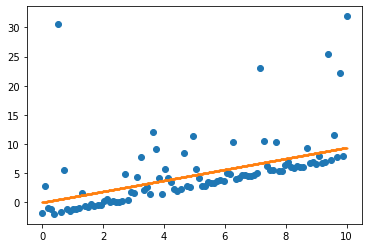

In [8]:
# データ生成デモ Log-normal
X = np.linspace(0,10,100)
np.random.shuffle(X)
Y = noise.LogNormal(sigma=1.75,dim=X.shape[0],n=1).generate() + X



a = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)



x_m = np.linspace(0,10,1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)



In [9]:
trial_num = 100 #試行回数
result_lognormal = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss_lognormal = [] # 過剰期待損失の最終結果　トライアル数*分割数k
valid_k = 100 # 分割数　1 ~ valid_k

w_star = 1
X_mean = 5
X_var = 2

for _ in tqdm(range(trial_num)):
    w_per_trial = []
    loss_store = []
    a = 0.01
    c = 5
    n = 250
    b = 1.75
    # 初期値wの決定
    rng = np.random.default_rng()
    w = rng.uniform(w_star-c,w_star+c)
    for k in range(1,valid_k+1):
        core_store = []
        model_store = []


        son = loss.LinearQuadraticLoss()
        for _ in range(k):
            core_num = n // k
            rng = np.random.default_rng()
            X = rng.normal(loc=X_mean,size=core_num,scale=X_var)
            Y = noise.LogNormal(sigma=b,dim=X.shape[0],n=1).generate() + X
            data = [X,Y]
            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            model_store.append(core.w)

        model_store = np.array(model_store)
        model_store = model_store.reshape([-1,1])
        tmp = merge.smallball(model_store)
        w_per_trial.append(tmp)
        loss_store.append(np.mean(son.f(y=Y_test,x=X_test,w=tmp)))

    result_lognormal.append(np.array(w_per_trial))
    result_loss_lognormal.append(np.array(loss_store))

result_lognormal = np.array(result_lognormal)
result_loss_lognormal = np.array(result_loss_lognormal)





  0%|          | 0/100 [00:00<?, ?it/s]

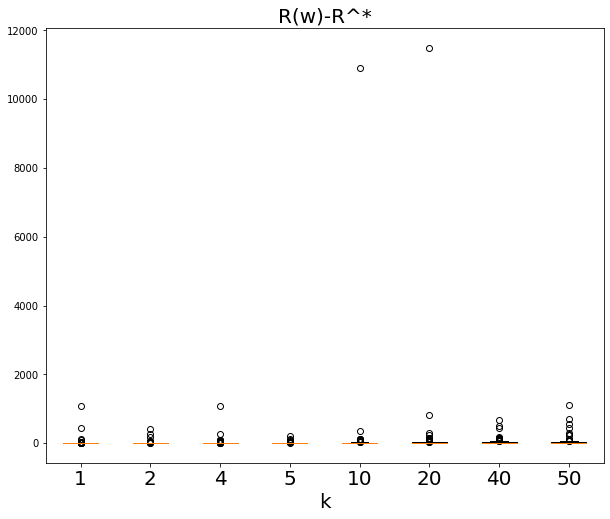

In [10]:
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19,39,49]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()

In [11]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19,39,49]],columns=columns)

In [12]:
df.describe()





,1,2,4,5,10,20,40,50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,22.654961,15.049822,23.574932,13.101316,127.244246,145.566003,38.391949,56.468401
std,115.757584,52.104386,110.492015,26.975548,1089.995714,1150.325154,96.416546,148.971249
min,2.471601,2.464853,2.459742,2.463514,2.459494,2.459568,2.462541,2.618249
25%,3.300324,2.921523,2.792964,2.920971,3.003455,2.779973,3.792917,6.258891
50%,4.264286,4.051302,3.525431,3.926968,4.953854,4.351562,7.287892,15.508078
75%,5.898373,6.733354,6.517193,8.745257,12.742180,19.090397,25.233018,30.441413
max,1079.488851,417.607991,1072.066434,208.054474,10910.315418,11497.681998,683.448804,1096.017516
